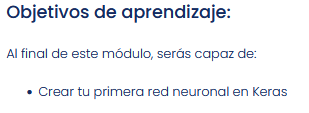

Keras es un API que actúa como una interfaz para Tensorflow. Es una opción popular para crear redes neuronales, en especial cuando se está aprendiendo por primera vez, ya que abstrae la mayor parte de las complejidades involucradas en el aprendizaje profundo. Otra opción popular es Pytorch. Si bien no trataremos formalmente Pytorch, es posible que quieras desafiarte para aprender esta biblioteca también. Más recursos serán proporcionados al final de este capítulo.

Red neuronal en Keras

Para crear una red neuronal en Keras, podemos seguir los siguientes pasos fáciles:

1. Definir nuestra estructura de red
2. Compilar nuestro modelo
3. Ajustar nuestro modelo 

¡Intentémoslo en un problema de clasificación!

Nota: puedes mirar un video tutorial sobre este código al final de este módulo.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Importa los datos

El conjunto de datos proviene de [Data.World](https://data.world/exercises/logistic-regression-exercise-1) y el objetivo es utilizar las estadísticas de un jugador de basquetbol para predecir si el Rookie de la NBA durará al menos 5 años en la liga o no. Puedes descargar los datos [aqui](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/nba.csv).

La columna objetivo se define como:

    y = 0 si los años de carrera jugados es < 5
    y = 1 si los años de carrera jugados es >= 5

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/nba.csv", index_col="Name")
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Limpieza de nulos y definicion X e y

In [8]:
df.dropna(inplace=True)

X = df.drop(columns="TARGET_5Yrs")

y = df["TARGET_5Yrs"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 3)

Escala los datos

Queremos escalar nuestros datos cuando se utilice las redes neuronales. Esto puede ayudar al modelo ajustarse más rápido y encontrar la mejor solución.

In [11]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Paso 1: definir nuestra estructura de red

Lo primero que debemos hacer es definir cuántas características tenemos en nuestros datos X. Esto se utilizará en nuestra primera capa oculta, donde tendremos que decirle a Keras cuántas características debe esperar en nuestra capa de entrada.

In [12]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

Luego podemos definir nuestro tipo de modelo. Utilizaremos un modelo secuencial, es decir, que nuestras capas de modelo se ejecutan secuencialmente. Este es un tipo muy común de modelo para utilizar en Keras.

In [13]:
# Sequential model
model = Sequential()

¡Ahora podemos agregar nuestras capas ocultas! Utilizaremos dos capas ocultas en este ejemplo, pero en realidad puedes utilizar tan pocos o tantos como quieras. Sin embargo, ten cuidado en agregar muchas capas ocultas, al aumentar la complejidad, favorece la naturaleza de la caja negra y puede llevar a un sobreajuste.

Existen muchos tipos de capas en Keras y estos refieren al tipo de red neuronal que estamos ajustando. La capa más común es una capa densa, lo que significa que la red está conectada completamente.

Dentro de una capa densa necesitamos especificar el número de neuronas que queremos en esa capa y el tipo de función de activación que queremos utilizar. El número de neuronas en cada capa depende de ti. Como regla de oro, utiliza menos que o igual al número de características que tienes y disminuye el número de neuronas a medida que avanza la red. Dentro de las capas ocultas, es común utilizar la función ReLU, ya que tiende a funcionar bien.

In [14]:
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

Luego debemos agregar nuestra capa de salida. La capa de salida necesita tener el número de nodos que quieres en tu capa de salida (este suele ser 1, pero puede ser más para una clasificación multiclase) y la función de activación para la tarea específica. La función de activación determina el rango de valores que puede y debe tomar la capa de salida.

Para problemas de regresión, debemos utilizar la función de activación lineal.

Para problemas de clasificación, debemos utilizar la función de activación sigmoide.

In [15]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

#Paso 2: compilar nuestro modelo

Al compilar nuestro modelo, necesitamos especificar qué función de pérdida estamos utilizando y qué optimizador utilizaremos para el ajuste. Un optimizador común para elegir es el optimizador Adam.


- Para los problemas de regresión, debemos utilizar una función de pérdida como ECM.

- Para problemas de clasificación binaria como este, debemos utilizar la pérdida de entropía cruzada binaria. Esto se puede abreviar como “bce” en Keras.

- Para problemas clasificación multiclase, podemos utilizar la entropía cruzada categórica.

In [16]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

# Paso 3: ajustar nuestro modelo 

Finalmente podemos ajustar nuestro modelo a nuestros datos de entrenamiento. A menudo queremos guardar el proceso de ajuste para poder visualizar nuestra pérdida con el tiempo.

In [21]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 11ms/step - loss: 0.4587 - val_loss: 0.5859
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4588 - val_loss: 0.5849
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4577 - val_loss: 0.5895
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4569 - val_loss: 0.5860
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4566 - val_loss: 0.5884
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4565 - val_loss: 0.5912
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4553 - val_loss: 0.5896
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4550 - val_loss: 0.5894
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4544 - val_loss: 0.5887
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4531 - val_loss: 0.5919


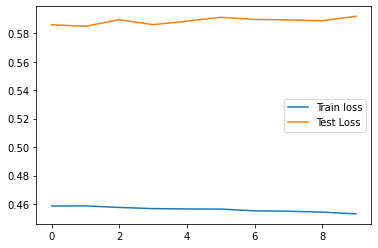

In [22]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Podemos observar que a medida que aumentamos el número de épocas para que el entrenamos nuestro modelo, tanto la pérdida de entrenamiento como la de validación disminuya. Esto es exactamente lo que queremos, ya que queremos que la pérdida sea lo más bajo posible. En la realidad, queremos ejecutar nuestro modelo para más de 10 épocas.